In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np


In [19]:
csv_file_path = "car data.csv"
df = pd.read_csv(csv_file_path)

In [21]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [77]:
print("Initial Info of the DataFrame:\n")
df.info()
print("\nMissing values in each column:\n", df.isnull().sum().to_markdown(numalign="left", stralign="left"))

Initial Info of the DataFrame:

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Selling_Price  299 non-null    float64
 1   Present_Price  299 non-null    float64
 2   Driven_kms     299 non-null    int64  
 3   Fuel_Type      299 non-null    object 
 4   Selling_type   299 non-null    object 
 5   Transmission   299 non-null    object 
 6   Owner          299 non-null    int64  
 7   Car_Age        299 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 21.0+ KB

Missing values in each column:
 |               | 0   |
|:--------------|:----|
| Selling_Price | 0   |
| Present_Price | 0   |
| Driven_kms    | 0   |
| Fuel_Type     | 0   |
| Selling_type  | 0   |
| Transmission  | 0   |
| Owner         | 0   |
| Car_Age       | 0   |


In [23]:
print("Missing values in each column:\n", df.isnull().sum().to_markdown(numalign="left", stralign="left"))

Missing values in each column:
 |               | 0   |
|:--------------|:----|
| Car_Name      | 0   |
| Year          | 0   |
| Selling_Price | 0   |
| Present_Price | 0   |
| Driven_kms    | 0   |
| Fuel_Type     | 0   |
| Selling_type  | 0   |
| Transmission  | 0   |
| Owner         | 0   |


In [25]:
print("\nNumber of duplicate rows (before removal):", df.duplicated().sum())




Number of duplicate rows (before removal): 2


In [27]:
df.drop_duplicates(inplace=True)
print(f"Number of rows after removing duplicates: {df.shape[0]}")

Number of rows after removing duplicates: 299


In [29]:
df = df.drop('Car_Name', axis=1)

In [31]:
df

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [39]:
sns.set_style("whitegrid")


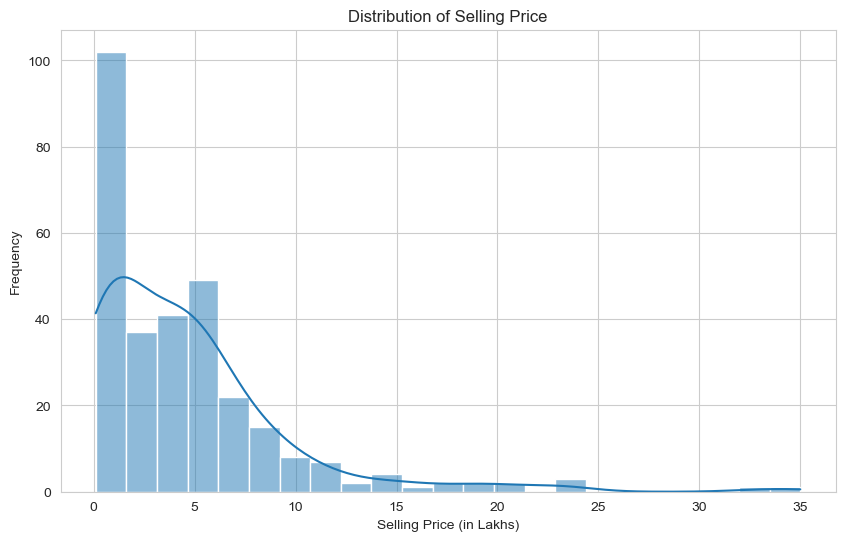

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Selling_Price'], kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price (in Lakhs)')
plt.ylabel('Frequency')
plt.show()


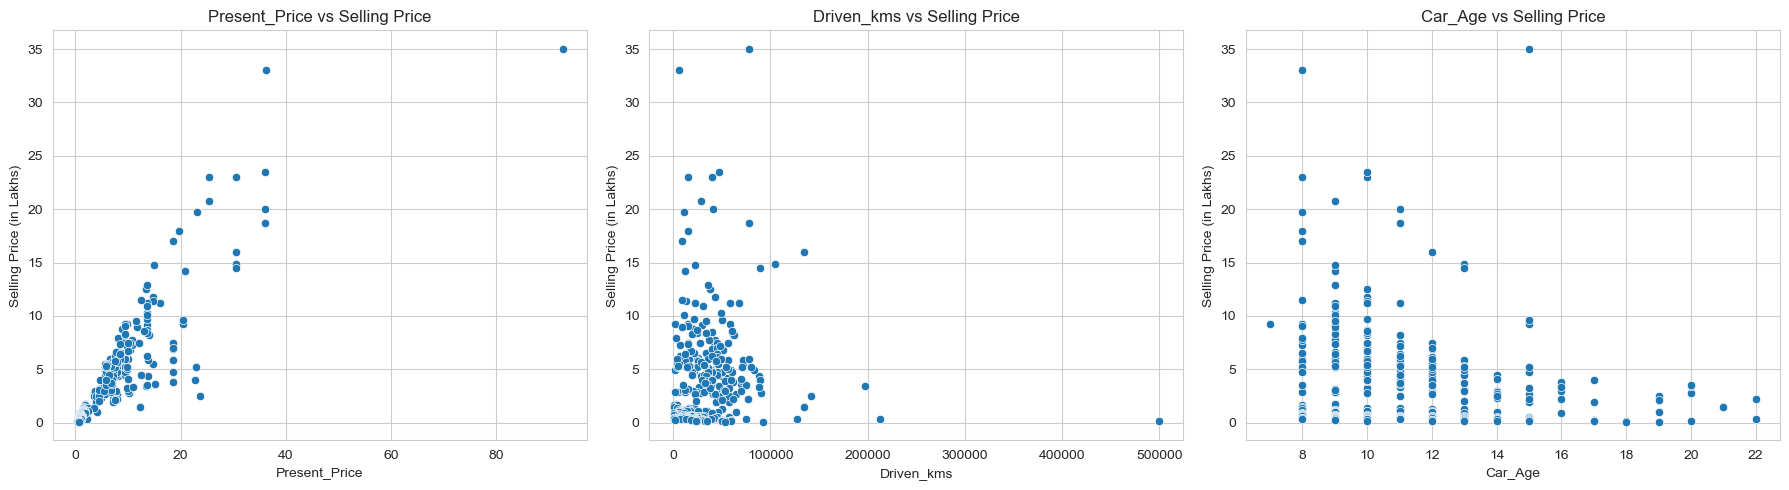

In [43]:
numerical_cols = ['Present_Price', 'Driven_kms', 'Car_Age']
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(18, 5))
for i, col in enumerate(numerical_cols):
    sns.scatterplot(x=df[col], y=df['Selling_Price'], ax=axes[i])
    axes[i].set_title(f'{col} vs Selling Price')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Selling Price (in Lakhs)')
plt.tight_layout()
plt.show()

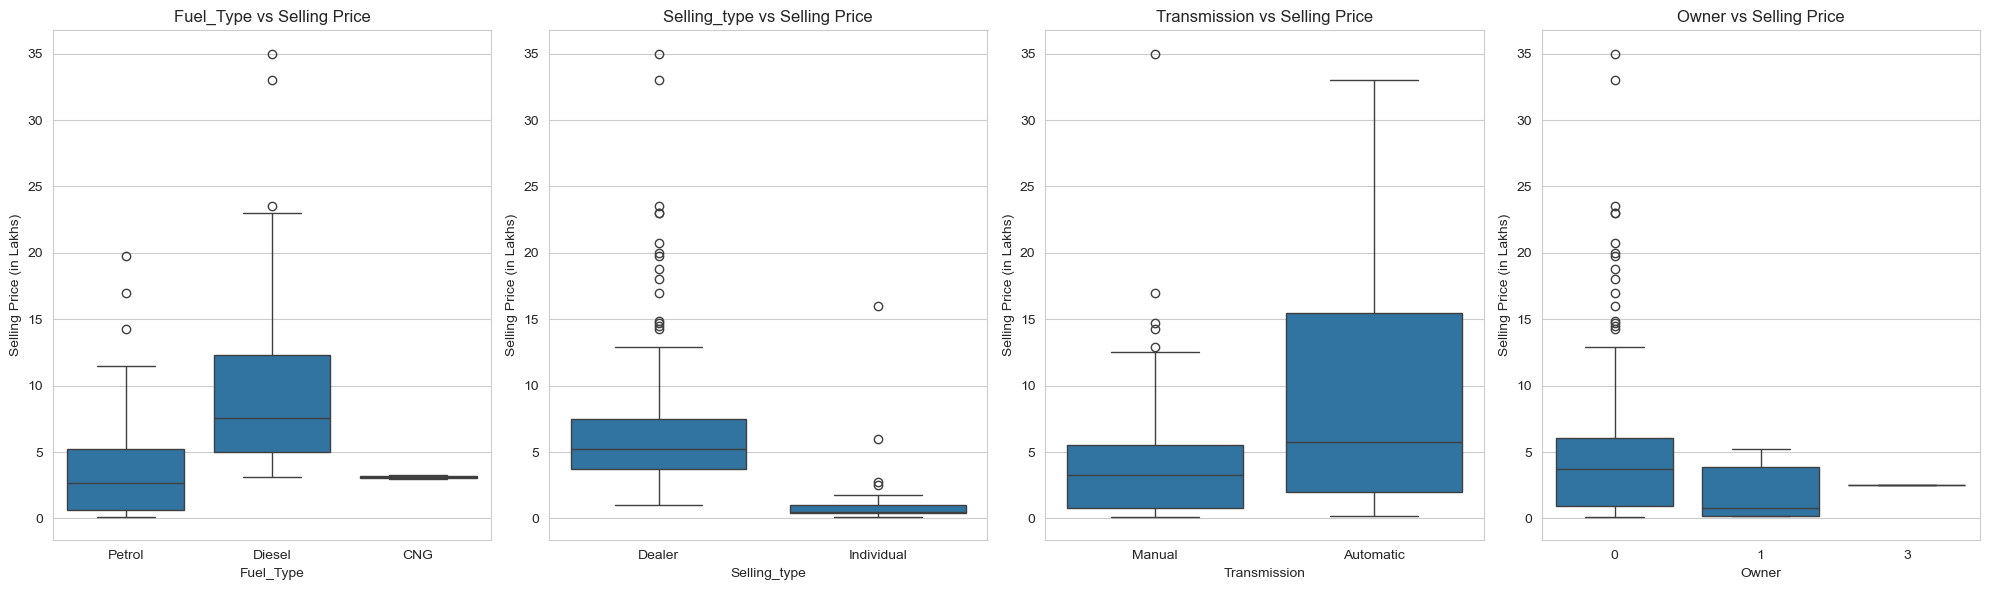

In [45]:
categorical_cols = ['Fuel_Type', 'Selling_type', 'Transmission', 'Owner']
fig, axes = plt.subplots(1, len(categorical_cols), figsize=(20, 6))
for i, col in enumerate(categorical_cols):
    sns.boxplot(x=df[col], y=df['Selling_Price'], ax=axes[i])
    axes[i].set_title(f'{col} vs Selling Price')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Selling Price (in Lakhs)')
plt.tight_layout()
plt.show()

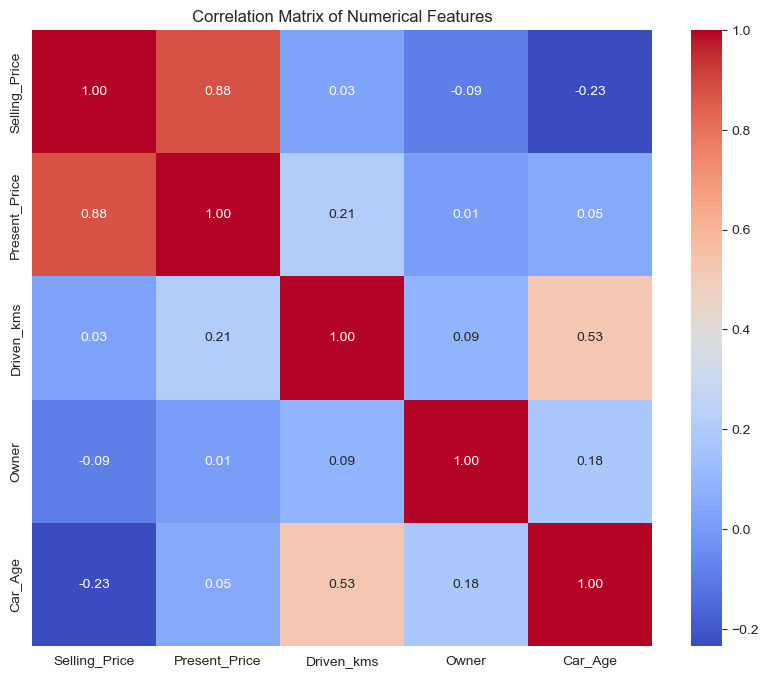

In [47]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [53]:
df_encoded = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)
print("First 5 rows of df_encoded:\n", df_encoded.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nInfo of df_encoded:\n")
df_encoded.info()


print(f"\nShape of df_encoded: {df_encoded.shape}")

First 5 rows of df_encoded:
 | Selling_Price   | Present_Price   | Driven_kms   | Owner   | Car_Age   | Fuel_Type_Diesel   | Fuel_Type_Petrol   | Selling_type_Individual   | Transmission_Manual   |
|:----------------|:----------------|:-------------|:--------|:----------|:-------------------|:-------------------|:--------------------------|:----------------------|
| 3.35            | 5.59            | 27000        | 0       | 11        | False              | True               | False                     | True                  |
| 4.75            | 9.54            | 43000        | 0       | 12        | True               | False              | False                     | True                  |
| 7.25            | 9.85            | 6900         | 0       | 8         | False              | True               | False                     | True                  |
| 2.85            | 4.15            | 5200         | 0       | 14        | False              | True               | False    

In [59]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [63]:
y_pred = rf_model.predict(X_test)

In [69]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 

In [71]:
print(f"\n--- Model Evaluation Results ---")
print(f"R-squared: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


--- Model Evaluation Results ---
R-squared: 0.5221
Mean Absolute Error (MAE): 1.4656
Mean Squared Error (MSE): 12.3172
Root Mean Squared Error (RMSE): 3.5096


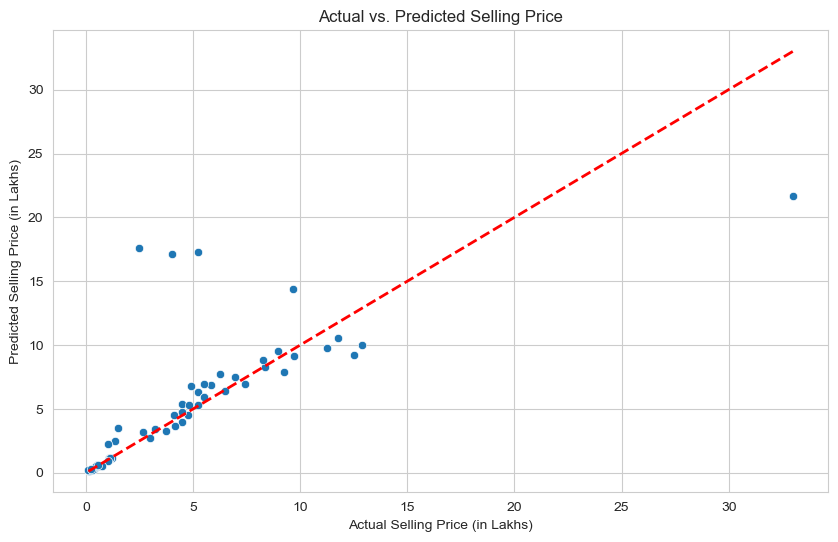

In [73]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Line for perfect prediction
plt.xlabel("Actual Selling Price (in Lakhs)")
plt.ylabel("Predicted Selling Price (in Lakhs)")
plt.title("Actual vs. Predicted Selling Price")
plt.show()

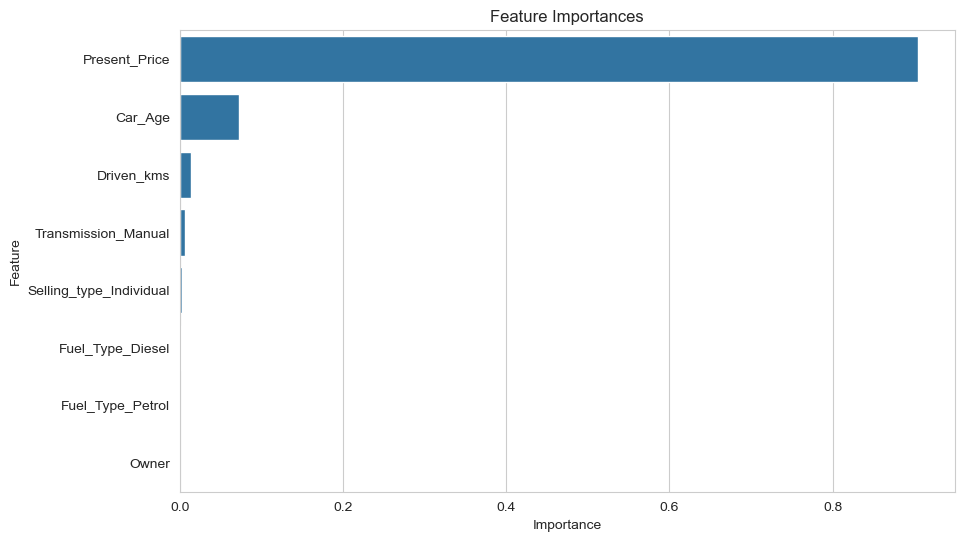

In [75]:
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()